This jupyter notebook is for testing painting GREAT array profiles onto the sky

In [1]:
#Import library
import sens_map_lib
import numpy as np
from astropy.modeling import models
from matplotlib import pyplot

S/N per beam:  [189.58499162]
200000.0000000001 166.79999999995417
Total S/N:  1199.040767386421
Signal =  200000.0000000069
Noise =  33359.99999999999
min noise=  0.8339999999999997
max S/N =  5.995203836930664


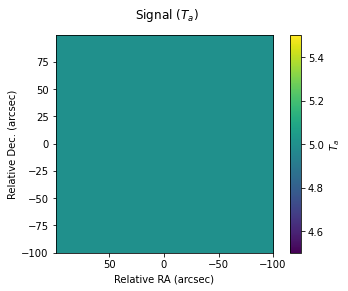

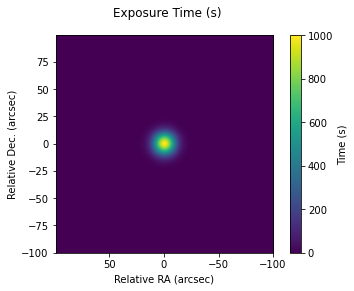

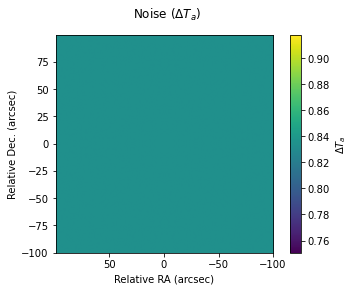

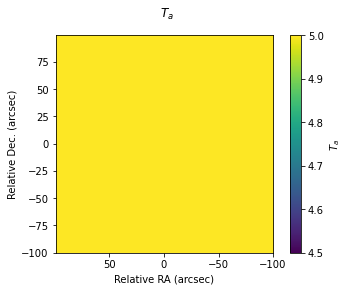

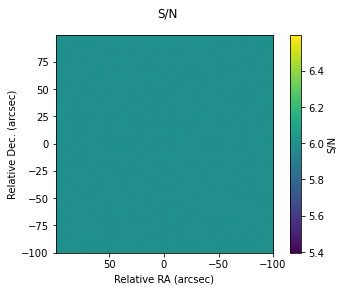

In [2]:
#Checking S/N calculations for a single 4G1 pointing

sky_grid = sens_map_lib.sky([-100.0,100.0], [-100.0,100.0], 1.0) #Generate sky object

sky_grid.uniform(5.0) #Give sky a 5 K uniform signal

#Generate a single pointing
fg1_array = sens_map_lib.FG1_array(freq=0.6e12)
fg1_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=1000.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=417.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

In [3]:
# #Test Array OTF Mapping with a multiple blocks

# sky_grid = sens_map_lib.sky([-300,300], [-300,300], 2.0) #Generate sky object


# #ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
# #sky_grid.input(ring) #Add in artifical ring signal

# #Set parameters for 2D gaussian
# x = 0.
# y = 0.
# amplitude = 10.0
# fwhm = 10.0
# stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
# point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
# sky_grid.input(point_source_gaussian)


# lfa_array = sens_map_lib.LFAV_array()
# lfa_array.array_otf(sky_grid, nblock_scan=2, nblock_perp=2, x=0.0, y=0., step=5.2, length=3.0, time=2.0, cycles=5, map_angle=0., direction='x', nscans=4)


# #Simulate the observations
# sky_grid.simulate_observation(Tsys=2480.0)

# #Print S/N
# print('S/N = ', sky_grid.s2n())

# #Show results
# pyplot.figure()
# sky_grid.plot('signal')
# pyplot.figure()
# sky_grid.plot('exposure')
# pyplot.figure()
# sky_grid.plot('noise')
# pyplot.figure()
# sky_grid.plot('data')
# pyplot.figure()
# sky_grid.plot('s2n')

# print('Block x centers: ', sky_grid.x_points)
# print('Block y centers: ', sky_grid.y_points)


In [4]:
pdb

Automatic pdb calling has been turned ON


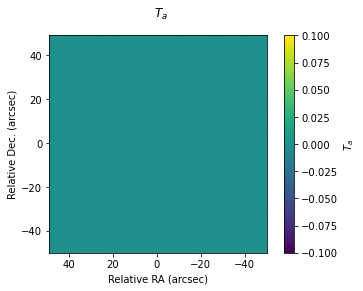

In [5]:
#Generate sky object
sky_grid = sens_map_lib.sky([-50,50], [-50,50], 1.0)

#Plot empty sky grid
sky_grid.plot('data')

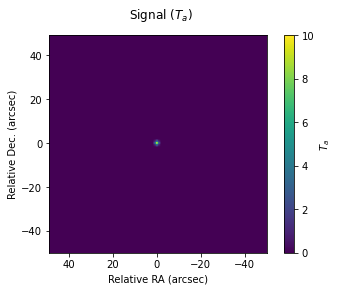

In [6]:
#Create a point source to model the "true" signal on the sky
#This source will be a 2D gaussian gererated from an astropy.modeling object

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

#Plot the "true" signal on the sky
sky_grid.plot('signal')

In [7]:
#Generate an LFA array object
lfa_array = sens_map_lib.LFAV_array()

S/N per beam:  [4.79651161e-01 4.13073260e-07 4.13828711e-07 4.13142201e-07
 4.13142201e-07 4.13828711e-07 4.13073260e-07]
87.19550210648238 360.90057300454947
Total S/N:  0.24160533018988364


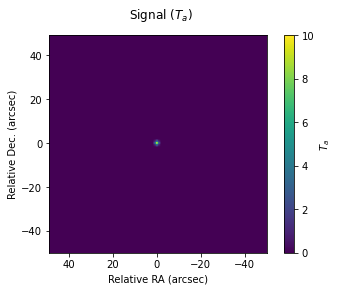

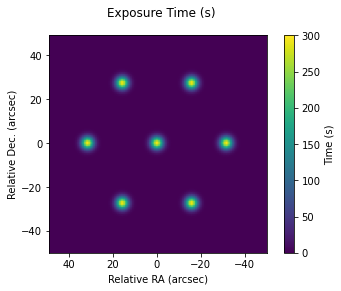

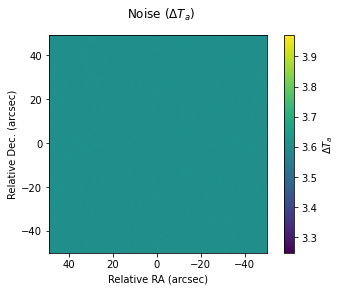

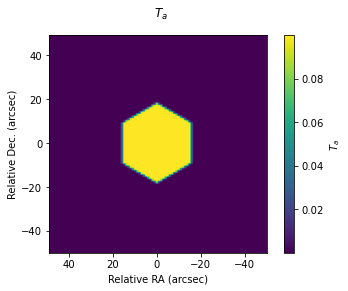

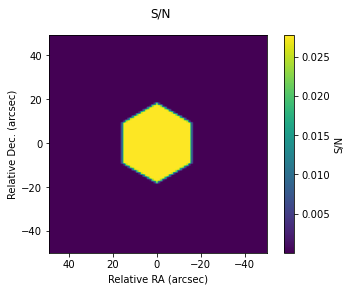

In [8]:
#Simulate a single point observation for the point source

#Clear sky object
sky_grid.clear()

#Test a single pointing being painted onto the sky
lfa_array.single_point(sky_grid, x=0., y=0., array_angle=0.0, time=60.0, cycles=5.0)
#lfa_array.single_point(sky_grid, x=10., y=0., array_angle=0.0, time=60.0, cycles=5.0)


#simulate observagtion
sky_grid.simulate_observation(Tsys=3000.0, deltafreq=1e6, TPOTF=True, Non=5)

#Show results
pyplot.figure()
sky_grid.plot('signal')

pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [9]:
#import cygrid
#cygrid.WcsGrid?

In [10]:
print(np.max(sky_grid.exptime))

300.0


S/N per beam:  [3.49004796e-01 3.00542677e-07 3.00646994e-07 3.00542677e-07
 3.00542677e-07 3.00647004e-07 3.00542677e-07 2.00330654e-01
 2.79268592e-06 4.52042999e-05 2.79268593e-06 1.06579911e-08
 6.59068649e-10 1.06579911e-08 2.00329636e-01 4.51981759e-05
 2.79290659e-06 1.06613447e-08 6.58618218e-10 1.06641568e-08
 2.79217518e-06 2.00329636e-01 2.79217518e-06 1.06641564e-08
 6.58618218e-10 1.06613447e-08 2.79290680e-06 4.51981759e-05
 2.00330654e-01 1.06579911e-08 6.59068618e-10 1.06579911e-08
 2.79268593e-06 4.52043027e-05 2.79268592e-06 2.00329636e-01
 6.58618217e-10 1.06641564e-08 2.79217518e-06 4.51981760e-05
 2.79290680e-06 1.06613447e-08 2.00329636e-01 1.06613447e-08
 2.79290659e-06 4.51981760e-05 2.79217518e-06 1.06641568e-08
 6.58618217e-10 6.60054070e-02 5.68666087e-08 2.41079818e-04
 2.41082814e-04 5.68421018e-08 1.34218847e-11 1.34079137e-11
 3.78882458e-02 8.55047624e-06 2.24003140e-03 8.55047625e-06
 1.24558264e-10 4.76254264e-13 1.24558264e-10 6.60054070e-02
 2.410828

/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:353: RuntimeWarning: invalid value encountered in true_divide
  self.data = self.data / self.exptime #normalize simulated data by exposure time
/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:354: RuntimeWarning: invalid value encountered in true_divide
  self.noise = self.noise / self.exptime**0.5
/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:378: RuntimeWarning: invalid value encountered in greater
  goodpix = np.isfinite(self.noise) & np.isfinite(self.data) & (self.noise > 0.)


22.757919425415913 1078.7742907675868
Total S/N:  0.021096089905167127


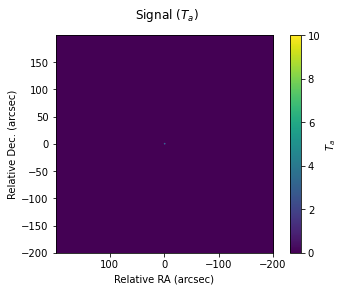

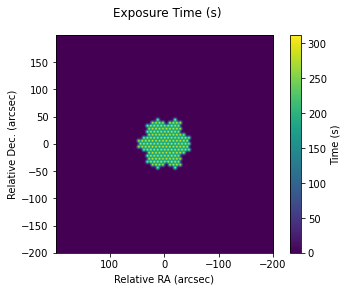

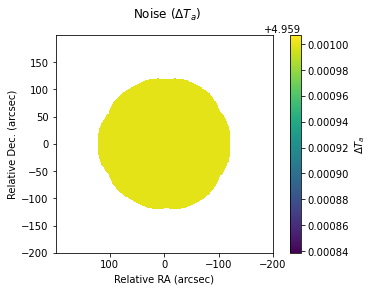

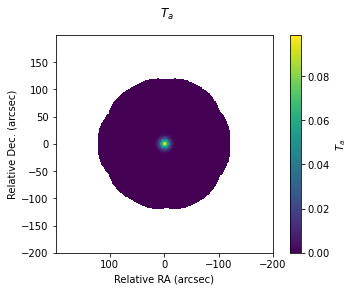

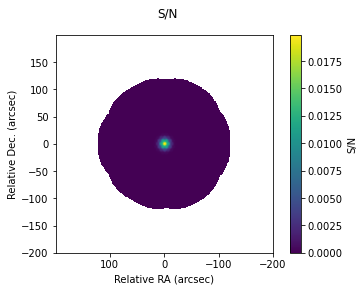

In [11]:
#Simulate a honeycomb map observation for the point source

#Clear sky object
#sky_grid.clear()
sky_grid = sens_map_lib.sky([-200,200], [-200,200], 1.0)


#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)


#Test a single pointing being painted onto the sky
lfa_array.honeycomb(sky_grid, x=0., y=0., array_angle=0.0, time=30.0, cycles=10.0)
#lfa_array.honeycomb(sky_grid, x=0., y=100, array_angle=0.0, time=30.0, cycles=10.0)



#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

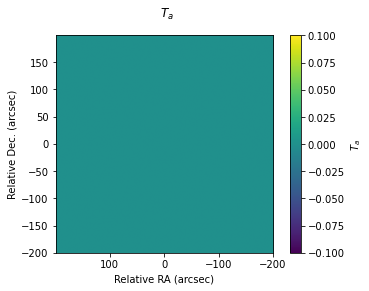

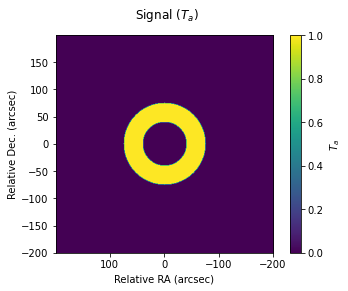

In [12]:
#Now we will test using a ring as our "science target"


#Generate sky object
sky_grid = sens_map_lib.sky([-200,200], [-200,200], 1.0)

#Plot empty sky grid
pyplot.figure()
sky_grid.plot()

#Create "ring" and input into sky_grid
ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=40.0, r_out=75.0)
sky_grid.input(ring)

#Plot the ring
pyplot.figure()
sky_grid.plot('signal')

S/N per beam:  [1.36833460e-01 1.98500637e-01 1.46809513e-01 1.23834739e-01
 9.13183246e-06 3.72234401e-07 1.14114045e-02 1.87186114e-01
 1.80223243e-01 7.29070925e-02 1.77901628e-01 3.33862513e-04
 2.82486354e-05 5.17658092e-02 2.00161221e-01 1.28957200e-01
 1.94506151e-02 1.97686221e-01 4.99593205e-03 8.38541172e-04
 1.22106006e-01 1.99911501e-01 6.24628421e-02 2.61311279e-03
 2.00934439e-01 3.22295878e-02 1.00555994e-02 1.77440224e-01
 1.85446328e-01 1.97515070e-02 2.38779430e-04 1.98171251e-01
 9.82223453e-02 5.16705288e-02 1.97654382e-01 1.32703189e-01
 4.58105067e-03 6.37491038e-04 1.83445328e-01 1.65763870e-01
 1.27205057e-01 2.00953079e-01 5.61437320e-02 1.01678406e-03
 2.77064751e-03 1.47523288e-01 1.95423682e-01 1.82807059e-01
 1.98271639e-01 1.14903603e-02 3.36571343e-04 4.51715748e-03
 9.89178489e-02 2.00883019e-01 1.99438713e-01 1.83672177e-01
 1.02905330e-03 2.49477318e-04 2.72561791e-03 5.80961117e-02
 1.98251741e-01 2.00577534e-01 1.47655875e-01 2.67359196e-04
 3.734140

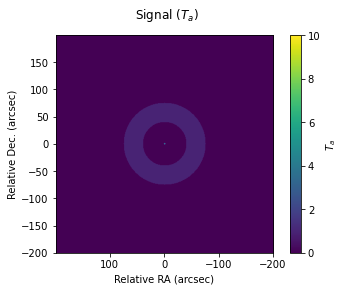

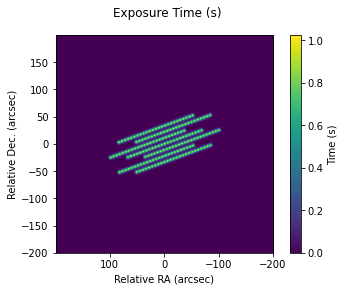

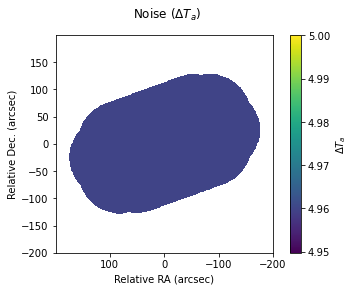

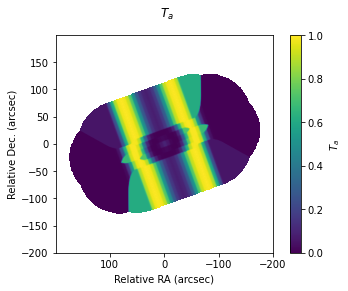

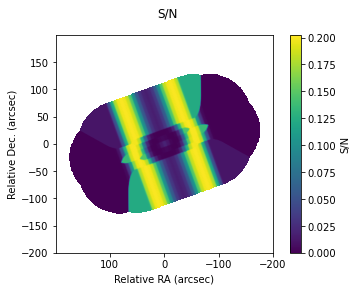

In [13]:
#Test raster mapping the ring and plotting the result

#Clear sky
sky_grid.clear()

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

#Test a raster map on the sky
lfa_array.map(sky_grid, x=0.0, y=0.0, array_angle=-19.1+20.0, map_angle=20.0, nx=25, ny=1,
                    dx=6.0, dy=6.0, time=1.0, cycles=1)


#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

/Users/kkaplan1/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/block.py:76: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)))


1342.7951972077967 81.36162457672822
Total S/N:  16.504036198803668
1342.7951972077967 81.36162457672822
S/N =  16.504036198803668


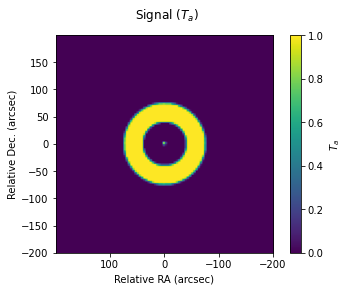

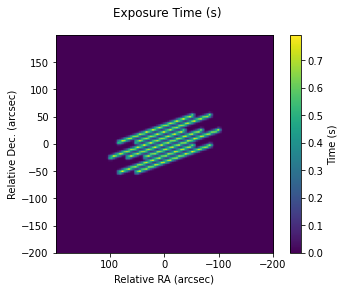

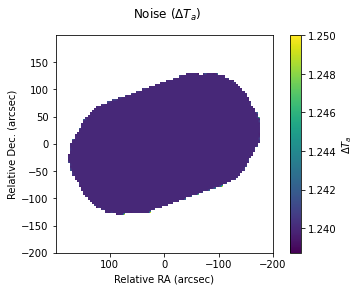

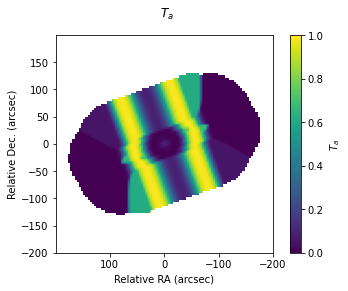

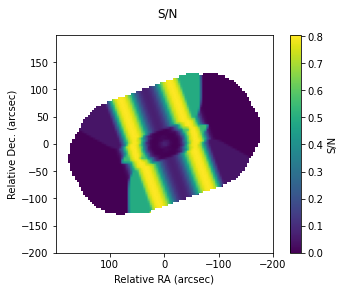

In [14]:
#Test downsampling by a factor of 4
sky_grid.downsample(4)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

S/N per beam:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.19075651e-25
 8.70294050e-21 9.61606485e-18 2.53105767e-15 1.82604070e-13
 4.40209757e-12 4.40681282e-11 2.13065672e-10 5.28985875e-10
 7.06778009e-10 5.28985875e-10 2.13065672e-10 4.40681282e-11
 4.40209757e-12 1.82604071e-13 2.53105787e-15 9.61613388e-18
 8.71268085e-21 5.51170666e-25 0.00000000e+00 7.96390954e-22
 2.325413

196994.30661469811 2199.9999999844104
Total S/N:  89.54286664367912


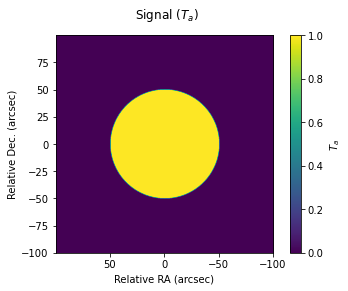

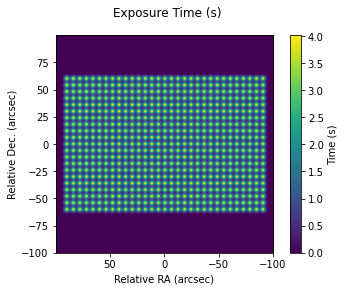

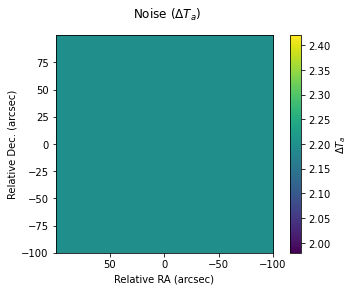

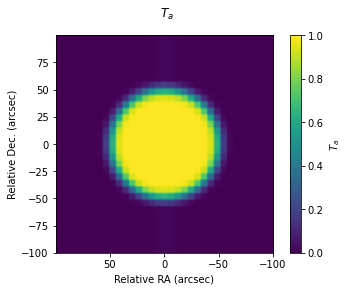

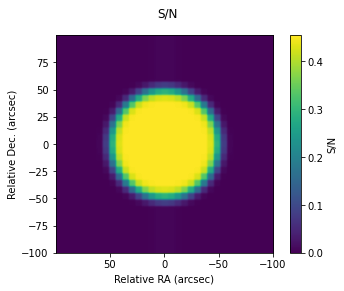

In [15]:
#Test reading in a .aor file and using it to map the ring

sky_grid = sens_map_lib.sky([-100,100], [-100,100], 0.2) #Generate sky object
ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
sky_grid.input(ring) #Add in artifical ring signal
aors = sens_map_lib.open_aors('test2.aor') #Read in .aor file the result is a list of aor objects
#for aor in aors: #Paint all aors in .aor file onto the exposure map for the sky_grid object, here we assume the LFAH array is used
#    aor.paint(sky_grid, 'LFAH') 
aors[2].paint(sky_grid, '4G4') 
sky_grid.simulate_observation(Tsys=1100.0)#Simulate the observations


#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

30.768891955737544 0.33
Total S/N:  93.239066532538


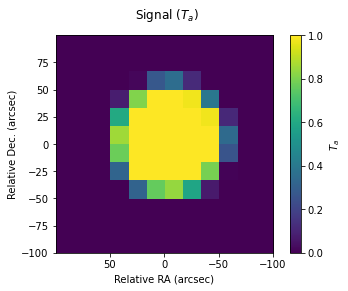

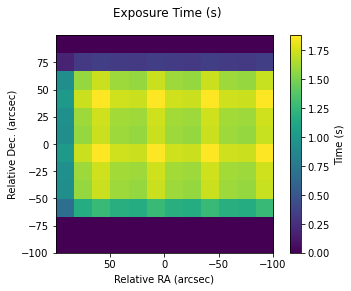

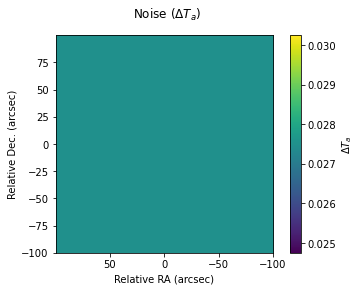

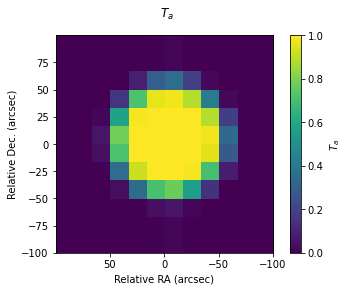

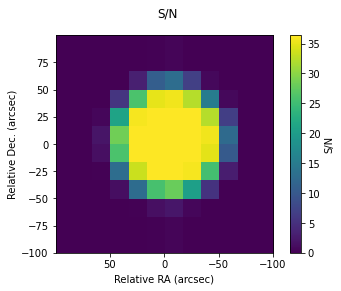

In [16]:
#Test downsampling to 10 arsecond pixels
factor = 16.0 / sky_grid.plate_scale
sky_grid.downsample(factor)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

S/N per beam:  [0. 0. 0. ... 0. 0. 0.]
566.5732589605162 6363.948259220911
Total S/N:  0.08902857721063204
566.5732589605162 6363.948259220911
S/N =  0.08902857721063204


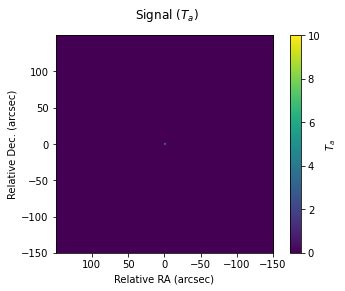

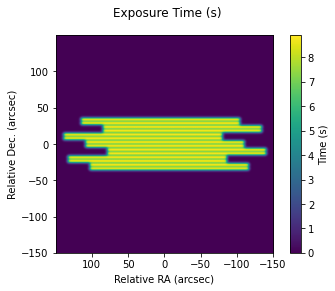

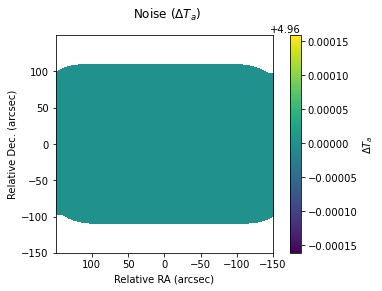

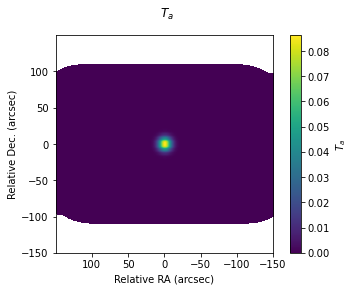

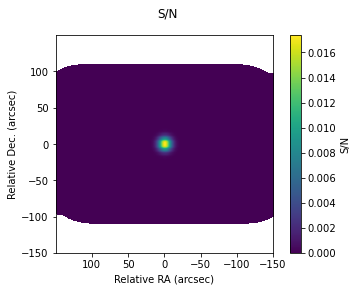

In [17]:
#Test Array OTF Mapping with a single block

sky_grid = sens_map_lib.sky([-150,150], [-150,150], 0.2) #Generate sky object


#ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
#sky_grid.input(ring) #Add in artifical ring signal

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

lfa_array = sens_map_lib.LFAV_array()
lfa_array.array_otf_block(sky_grid, x=0., y=0., step=3.0, length=3.0, time=1.0, cycles=5, map_angle=0., direction='x', nscans=2)

#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')


S/N per beam:  [2.64889302e-169 1.46480836e-160 1.34252151e-149 ... 1.14809002e-195
 9.64134893e-170 8.82233630e-151]
9080.96584146709 4020.106421644317
Total S/N:  2.2588869271159155
9080.96584146709 4020.106421644317
S/N =  2.2588869271159155


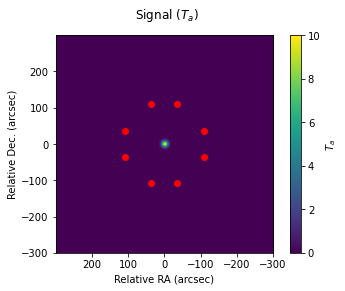

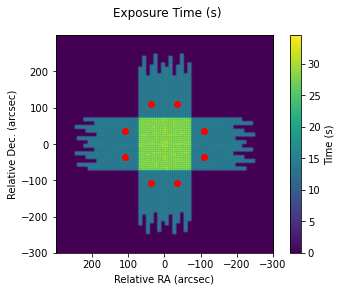

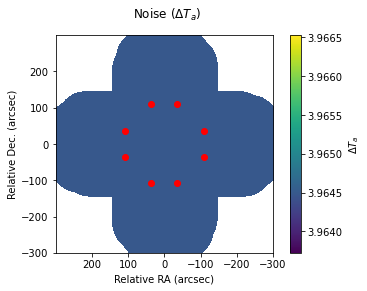

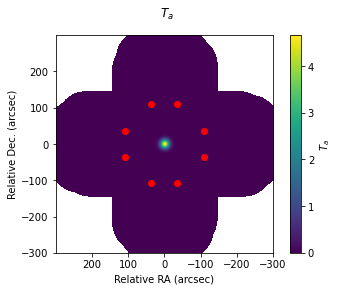

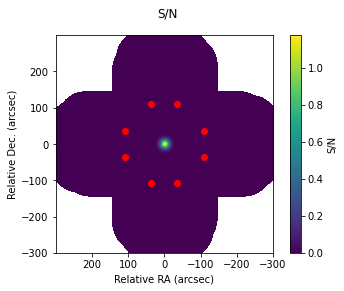

In [18]:
#Test Array OTF Mapping read in from an .aor file

sky_grid = sens_map_lib.sky([-300,300], [-300,300], 0.5) #Generate sky object


#ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
#sky_grid.input(ring) #Add in artifical ring signal

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 10.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

aors = sens_map_lib.open_aors('test.aor') #Read in .aor file the result is a list of aor objects
aors[4].paint(sky_grid, 'LFAH')

#Simulate the observations
sky_grid.simulate_observation(Tsys=3237.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

S/N per beam:  [6.43335049 6.43335049 6.43335049 6.43335049 6.43335049 6.43335049
 6.43335049]
559585.0 2600.0446462308314
Total S/N:  215.22130429998785
Signal =  559585.0000000005
Noise =  869818.8908719923
min noise=  7.77174369109018
max S/N =  0.6433562658187234


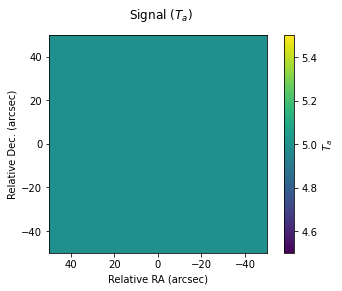

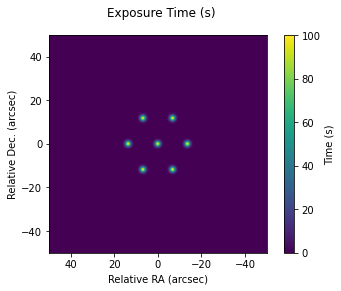

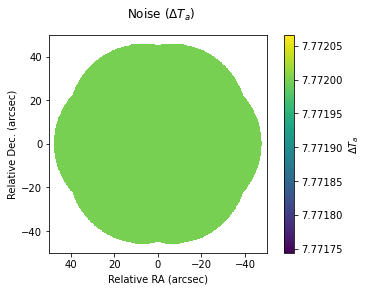

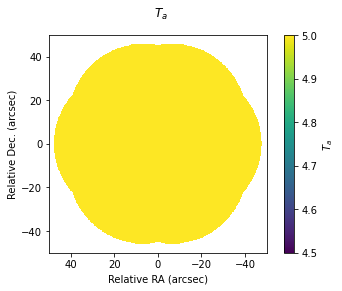

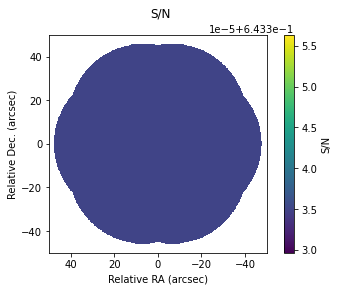

In [19]:
#Checking S/N calculations for a single HFA pointing

sky_grid = sens_map_lib.sky([-50,50], [-50,50], 0.25) #Generate sky object

sky_grid.uniform(5.0) #Give sky a 5 K uniform signal

#Generate a single pointing
hfa_array = sens_map_lib.HFA_array()
hfa_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=100.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=3886.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

In [20]:
np.nanmin(sky_grid.data[np.isfinite(sky_grid.data)])

4.999999999999903

S/N per beam:  [141.04717485 141.04717485 141.04717485 141.04717485 141.04717485
 141.04717485 141.04717485]
11020499.999999998 3328.520643272443
Total S/N:  3310.9303444683364
Signal =  11020499.999999614
Noise =  2470796.0955645815
min noise=  4.483971453968011
max S/N =  4.46033169597932


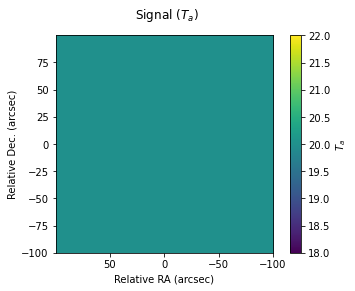

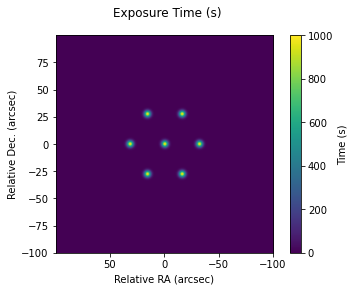

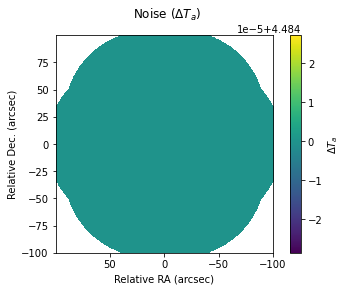

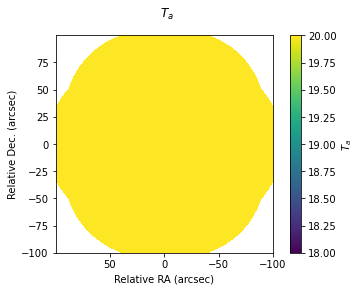

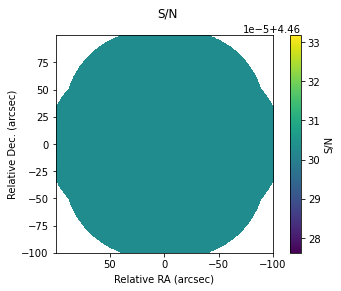

In [21]:
#Checking S/N calculations for a single LFA pointing

sky_grid = sens_map_lib.sky([-100,100], [-100,100], 0.25) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
hfa_array = sens_map_lib.LFAH_array()
hfa_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=1000.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=2242.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

S/N per beam:  [758.33996647]
3192700.0000000014 333.2192805361539
Total S/N:  9581.378349004619
Signal =  3192700.0000001634
Noise =  133135.59411226813
min noise=  0.8339664261827331
max S/N =  23.98178076729642


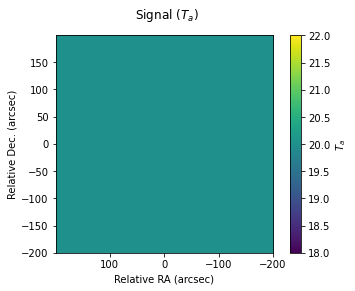

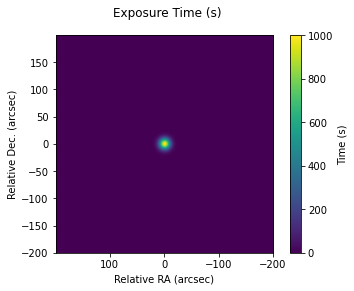

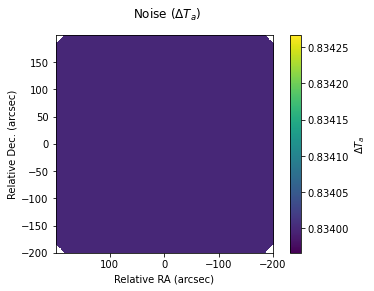

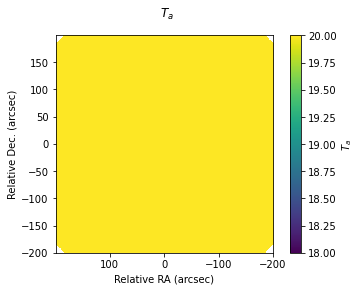

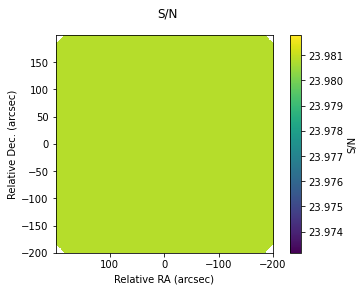

In [22]:
#Checking S/N calculations for a single 4G1 pointing

sky_grid = sens_map_lib.sky([-200.0,200.0], [-200.0,200.0], 1.0) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
fg1_array = sens_map_lib.FG1_array(freq=0.6)
fg1_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=1000.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=417.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

S/N per beam:  [398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.68291394
 398.68291394 398.68291394 398.68291394 398.68291394 398.6829

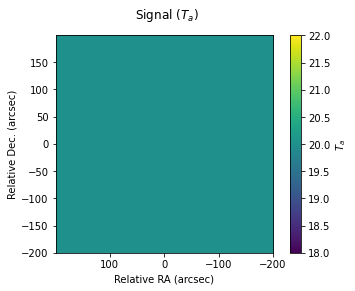

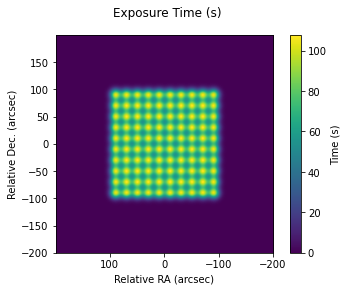

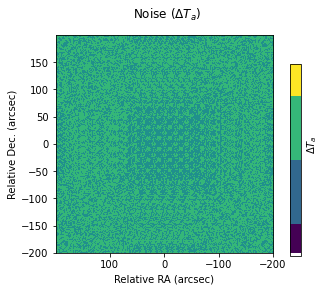

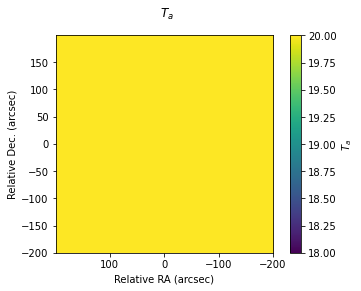

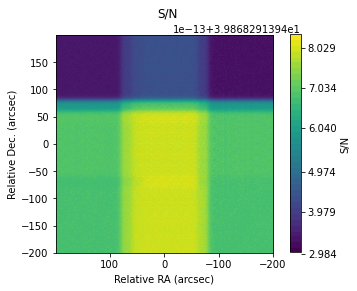

In [23]:
#Checking S/N calculations for a single 4G1 pointing

sky_grid = sens_map_lib.sky([-200.0,200.0], [-200.0,200.0], 1.0) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
fg1_array = sens_map_lib.FG1_array(freq=0.6)
fg1_array.map(sky_grid, x=0., y=0., nx=10, ny=10, dx=20.0, dy=20.0, array_angle=0., time=100.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=417.0, TPOTF=True, Non=5)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))
print('max exp. time = ', np.nanmax(sky_grid.exptime[goodpix]))

In [24]:
# #Test boxcar convolving a 2D gaussian

# sky_grid = sens_map_lib.sky([-50,50], [-50,50], 0.5) #Generate sky object

# #Set parameters for 2D gaussian
# x = 0.
# y = 0.
# amplitude = 10.0
# fwhm = 10.0
# stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
# point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
# sky_grid.input(point_source_gaussian)

# sky_grid.plot(map_type='signal')

S/N per beam:  [1.60881964e-46 3.59093669e-28 4.36188475e-22 ... 3.38952105e-42
 1.44381765e-21 1.03005575e-07]
3390.8255548432767 1210.9945728853772
Total S/N:  2.800033650658007


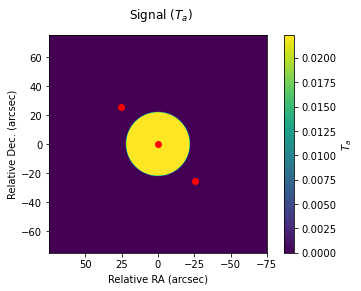

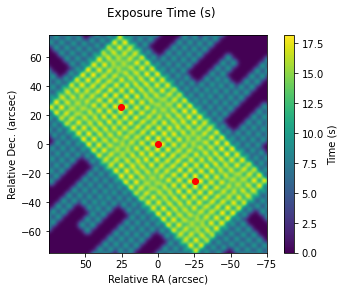

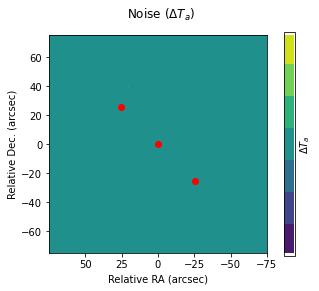

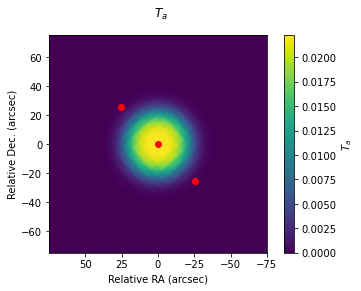

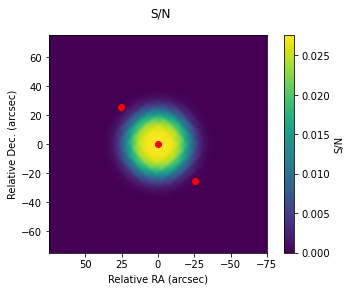

In [25]:
#Put the Bolatto project to the test
#Here we test the observations for NGC 0628

#Read in .aor file
aors = sens_map_lib.open_aors('07_0126.aor') #Read in .aor file the result is a list of aor objects

#Grab aor for NGC 0628
aor = aors[3]

#Generate sky object
sky_grid = sens_map_lib.sky([-75,75], [-75,75], .1) 

#Generate circle with shape and signal expected for [CII] in NGC 0628
circle = models.Disk2D(amplitude = 0.0223, x_0=0, y_0=0, R_0 = 22.0)
sky_grid.input(circle)



#Apply map from aor
aor.paint(sky_grid, 'LFAV')

sky_grid.simulate_observation(Tsys=2614.0, deltav=5.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

0.1324541232361848 0.045412296484289884
Total S/N:  2.916701719368157


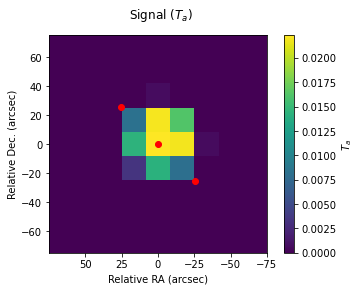

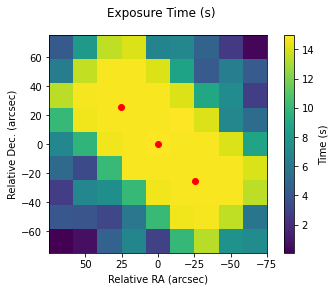

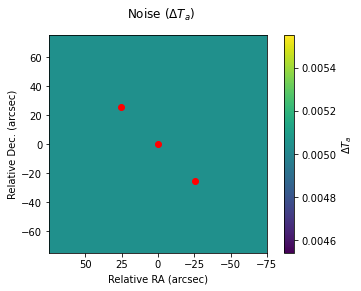

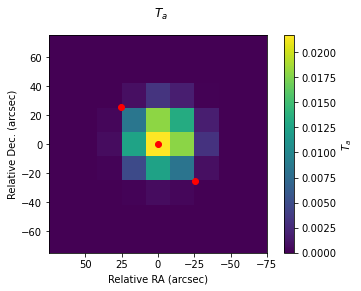

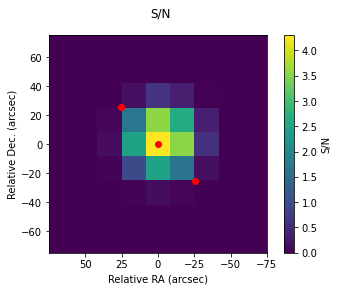

In [26]:
#Test downsampling to 10 arsecond pixels
factor = 16.0 / sky_grid.plate_scale
sky_grid.downsample(factor)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

S/N per beam:  [4.50899601e-19 7.45720170e-43 6.59124904e-27 3.20450879e-09
 3.27091655e-06 1.22361819e-19 1.97348558e-38 1.38378653e-15
 1.49932518e-37 3.92548732e-23 2.65387396e-07 8.82354353e-05
 1.75854959e-16 1.25250933e-33 1.58836644e-12 1.58959779e-32
 1.19643635e-19 9.14638747e-06 9.91881230e-04 1.09153032e-13
 4.29910352e-29 6.85788119e-10 7.96998524e-28 1.71250924e-16
 1.37695094e-04 4.98504461e-03 2.82138954e-11 7.46811572e-25
 1.12315189e-07 1.70441270e-23 1.06389835e-13 9.72002324e-04
 1.26191187e-02 3.05832798e-09 6.00428202e-21 7.06847367e-06
 1.43710262e-19 2.75869945e-11 3.55429989e-03 1.93368162e-02
 1.43709407e-07 2.03893864e-17 1.74598498e-04 4.60365070e-16
 3.00137769e-09 7.65837431e-03 2.23448005e-02 3.07156253e-06
 2.75390110e-14 1.75622228e-03 5.56491202e-13 1.41539527e-07
 1.12118573e-02 2.30085182e-02 3.17224863e-05 1.45322547e-11
 7.70010500e-03 2.55211868e-10 3.03533980e-06 1.25303356e-02
 2.23195072e-02 1.70286988e-04 3.02182441e-09 1.67253233e-02
 4.487705

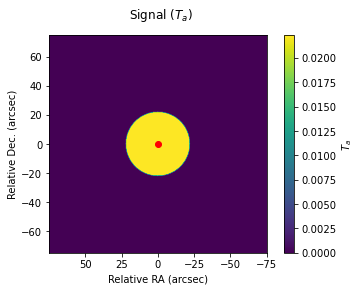

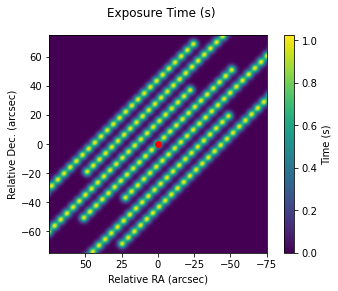

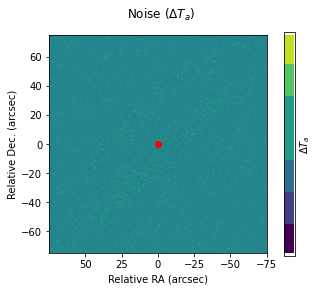

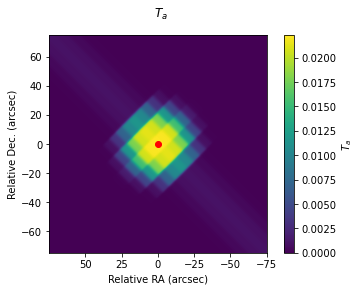

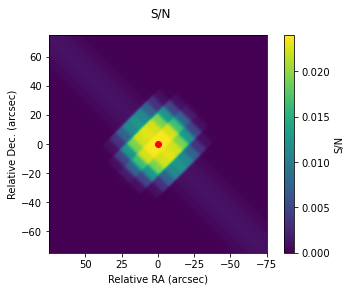

In [27]:
####TESTING EXPOSURE TIME AND NOISE CALCULATIONS FOR ARRAY OTF MAPPING




#Generate sky object
sky_grid = sens_map_lib.sky([-75,75], [-75,75], 0.25) 

#Generate circle with shape and signal expected for [CII] in NGC 0628
circle = models.Disk2D(amplitude = 0.0223, x_0=0, y_0=0, R_0 = 22.0)
sky_grid.input(circle)

lfa_array = sens_map_lib.LFAV_array()
#lfa_array.array_otf(sky_grid, nblock_scan=1, nblock_perp=1, x=0.0, y=0., step=5.2, length=3.0, time=1.0, cycles=8, map_angle=315., direction='x', nscans=2)
lfa_array.array_otf(sky_grid, nblock_scan=1, nblock_perp=1, x=0.0, y=0., step=6, length=2.0, time=1.0, cycles=1, map_angle=315., direction='y', nscans=1)


sky_grid.simulate_observation(Tsys=2614.0, deltav=5.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')

pyplot.figure()
sky_grid.plot('s2n')

In [28]:
# #Clear sky grid
# sky_grid.clear()

# #Test something like an OTF map on the sky
# lfa_array.map(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=30.0, nx=21, ny=21,
#                     dx=6.0, dy=6.0, time=1.0, cycles=5)

# #Show result
# sky_grid.plot()

In [29]:
# #Clear sky grid
# sky_grid.clear()

# #Test honeycomb map on the sky
# lfa_array.honeycomb(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=0.0, time=1.0, cycles=5)

# #Show result
# sky_grid.plot()

In [30]:
# #Read in .aor file and show what's inside, the result is a list of aor objects
# aors = sens_map_lib.open_aors('test.aor')

# #Set up a new sky grid for this
# sky_grid = sens_map_lib.sky([-100.0, 150.0], [-100.0, 150.0], 0.2)

In [31]:
# #Paint HFA first aor which is a single pointing
# sky_grid.clear() #Clear sky grid
# aors[0].paint(sky_grid, 'HFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [32]:
# #Paint HFA second aor which is a Raster map
# sky_grid.clear() #Clear sky grid
# aors[1].paint(sky_grid, 'HFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [33]:
# #Paint LFA third aor which is a OTF map
# sky_grid.clear() #Clear sky grid
# aors[2].paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [34]:
# #Paint LFA fourth aor which is a honeycomb map
# sky_grid.clear() #Clear sky grid
# aors[3].paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [35]:
# #Overplot all AORs for the LFA

# sky_grid.clear() #Clear sky grid
# for aor in aors:
#     aor.paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [36]:
# #Test reading in 4GREAT from an AOR

# sky_grid.clear() #Clear sky grid
# aors = sens_map_lib.open_aors('test2.aor')#Read in AORs

# #Single pointing
# aor = aors[0] #Grab a single pointing
# figure()
# sky_grid.clear()
# suptitle('4G1 Single Pointing')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 Single Pointing')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 Single Pointing')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 Single Pointing')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

# #Raster Map
# aor = aors[1] #Grab raster map
# figure()
# sky_grid.clear()
# suptitle('4G1 Raster Map')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 Raster Map')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 Raster Map')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 Raster Map')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

# #OTF Map
# aor = aors[2] #Grab OTF map
# figure()
# sky_grid.clear()
# suptitle('4G1 OTF Map')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 OTF Map')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 OTF Map')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 OTF Map')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()